<img src="imgs/dh_logo.png" align="right" width="50%">

# Aula 3.5.2 - Clustering 

Fala galera! Tudo bem? Hoje continuaremos a aula de clustering/unsupervised learning. Na aula passada, vimos os conceitos básicos de clustering, bem como o algoritmo mais simples para a tarefa (simples, porém muito eficiente em vários casos!). Hoje, veremos 2 novos algoritmos e como aplicá-los na vida real.

In [48]:
# Dependencies

import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Dica de hoje: 

Bom, como hoje a aula é de clustering, tentei achar alguns bons links de apoio para vocês!
 - __[Esse link](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)__ lista 5 dos principais tipos de algoritmos de clustering que um cientista de dados deve saber. É uma ótima leitura para saber com o que trabalhamos no nosso dia-a-dia :)
 - __[K-Means vs Mean Shift](http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/)__
 - __[Esse link](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)__ é uma forma interativa de visualizar o DBSCAN funcionando! É sempre bom ver nossos algoritmos funcionando passo-a-passo quando estamos aprendendo sua lógica, recomendo fortemente!

## Mean Shift sobre Dados Artificiais

Vamos repetir o exercício de clusterização da aula anterior, mas com um algoritmo novo: mean shift! Uma das fraquezas que observamos no K-Means é que ele funciona de modo muito manual e repetitivo: temos que rodar um loop, extrair o cotovelo ou sihlouette scores para então achar o melhor K. Contornando essa questão, existem os algoritmos de clustering hierárquico: eles conseguem decidir sozinhos como agrupar dados em quantas seções. Vamos observar como aplicar o Mean-Shift em dados artificiais. Na célula abaixo, crie clusters com o `make_blobs` (o mesmo da aula passada), utilizando os clusters abaixo como `centers`, 800 samples e 3 features.

In [50]:
clusters = [[1,1,1],[5,5,5],[3,10,10]]

In [51]:
# seu código aqui

In [52]:
# %load solutions/solution_05.py
X, _ = make_blobs(n_samples = 800, centers = clusters, n_features=3)

Abaixo, vamos aplicar o `MeanShift`. Sua classe se encontra no módulo *cluster* do sci-kit, e sua documentação está __[aqui](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)__. Também será necessário criar uma variável `cluster_centers` que recebe o atributo `cluster_centers_` do modelo.

In [53]:
# seu código aqui

In [54]:
# %load solutions/solution_06.py
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_

In [55]:
cluster_centers

array([[ 4.84845532,  4.95235049,  5.01960521],
       [ 2.99603826, 10.00482843,  9.96886817],
       [ 1.05913563,  0.91820366,  0.99282205]])

Agora, temos vamos visualizar os resultados do Mean Shift:

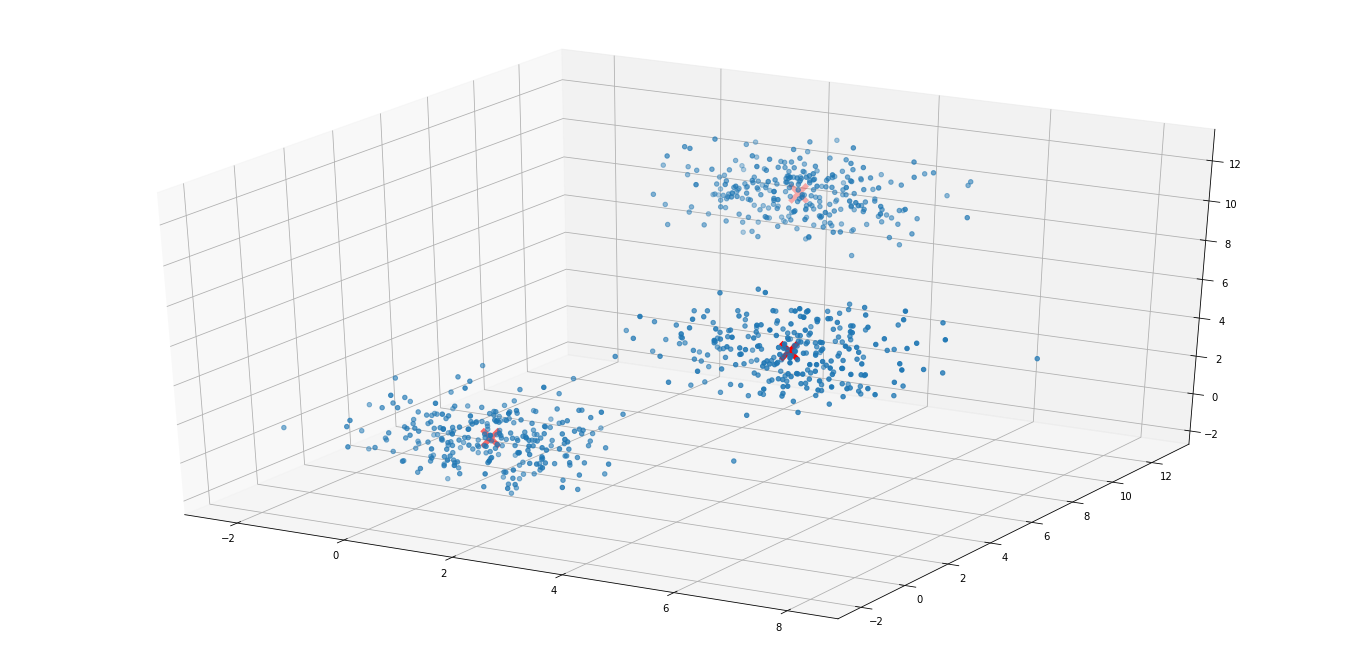

In [56]:
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)

Nas células abaixo, tente criar novos clusters com uma quantidade massiva de datapoints (>10k) e quantos centros você quiser. Tente aplicar K-Means e Mean-Shift. Quais diferenças você percebe, tanto de performance quanto de facilidade de implementação?

In [57]:
# crie os novos blobs aqui
clusters = [[1,1,20],[10,10,10],[20,10,1],[1,20,20],[20,20,20]]
X, y = make_blobs(n_samples = 1000, centers = clusters, n_features=3)

In [58]:
# implemente K-Means
# %load solutions/solution_01.py
from sklearn.cluster import KMeans

# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_



Cluster  1
[20.11054487 20.02549601 19.94261251]
Cluster  2
[ 1.07981631  1.12572174 19.94225397]
Cluster  3
[10.00073757 10.01317381 10.05022198]
Cluster  4
[ 1.06806157 20.04820747 20.03653166]
Cluster  5
[20.01261234 10.01687282  1.14225299]


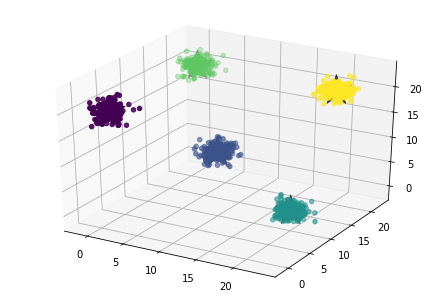

In [59]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
counter = 1
for cluster in C:
    print('Cluster ',counter)
    print(cluster)
    counter += 1

In [60]:
# implemente Mean Shift
ms = MeanShift(bandwidth=5)
ms.fit(X)
cluster_centers = ms.cluster_centers_

In [61]:
cluster_centers

array([[20.11054487, 20.02549601, 19.94261251],
       [20.01261234, 10.01687282,  1.14225299],
       [10.00073757, 10.01317381, 10.05022198],
       [ 1.07981631,  1.12572174, 19.94225397],
       [ 1.06806157, 20.04820747, 20.03653166]])

In [62]:
cluster_centers[:, 0]

array([20.11054487, 20.01261234, 10.00073757,  1.07981631,  1.06806157])

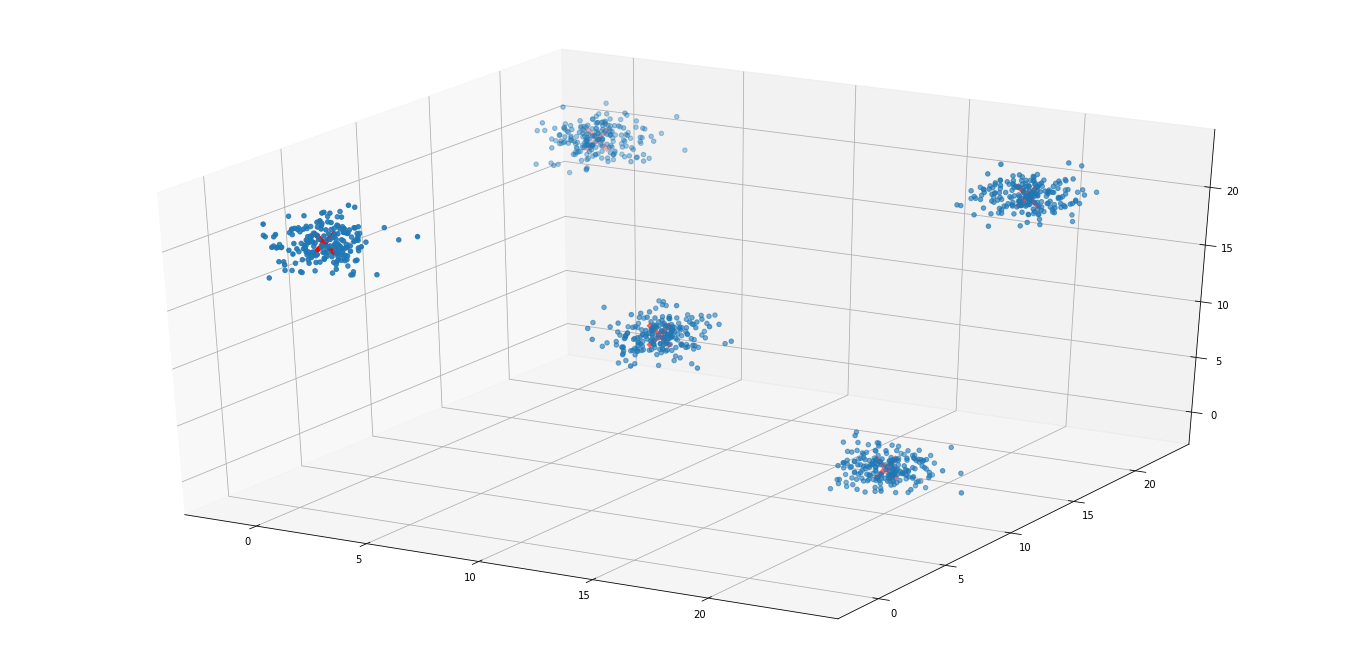

In [66]:
# faça o plotting dos resultados
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
ax.scatter(cluster_centers[:,0], 
           cluster_centers[:,1], 
           cluster_centers[:,2], 
#            cluster_centers[:,3], 
#            cluster_centers[:,4], 
           marker='x', color='red', s=500, linewidth=5, zorder=10)

## DBSCAN - Clustering by Density

Até agora vimos algoritmos de clustering com base em centroides. Embora úteis, eles podem cair em armadilhas comuns de acordo com a forma dos dados (por exemplo, deixar um outlier influenciar sua média e calcular centroides errados). Há uma outro tipo de algoritmos de clustering que se baseiam no conceito de densidade! Eles observam os arredores dos dados e tomam decisões a partir disso. A premissa deles é forte, pois é de se pensar que dados semelhantes estão próximos uns dos outros, independente de sua forma. <br>
O mais famoso algoritmo de clustering por densidade é o DBSCAN (Density-Based Spatial Clustering of Applications with Noise). O DBSCAN possui 2 parâmetros:
 - ɛ: o raio da vizinhança
 - minPts: o número mínimo de datapoints de uma vizinhança para que ela seja considera um cluster. <br>
 
Dessa forma, temos 3 tipos de dados a partir desse algoritmo:
 - Core points: os pontos que estão diretamente influenciando na densidade de nossa vizinhança
 - Border Points: os pontos que são alcançaveis por vizinhanças de vizinhanças
 - Outliers: pontos fora de qualquer vizinhança
 
Os passos do DBSCAN são os seguintes:
 - Escolha um ponto que ainda não foi dito como outlier ou assimilado a um cluster. Calcule sua vizinhança e determine se é um Core Point. Se sim, inicie uma nova vizinhança a partir dele.
 - Adicione todos os directly-reachable points desse novo cluster ao seu cluster.
 - Repita esses 2 passos até todos os clusters serem encontrados
 - Identifique os outliers
 
Vamos ver o DBSCAN na prática! Lidaremos com o __[whosale customers data](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)__: um dataset de 440 consumidores com 8 atributos cada. Seria possível descobrir segmentos de consumidores a partir desses atributos? Nas células abaixo, importe o dataset *wholesale_customers_data.csv* que está na pasta *data*. Depois, chame os métodos exploratórios básicos. Caso queira fazer algum plot, sinta-se à vontade.

In [16]:
# seu codigo aqui

In [42]:
df = pd.read_csv(r'Wholesale customers data.csv', sep=',')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


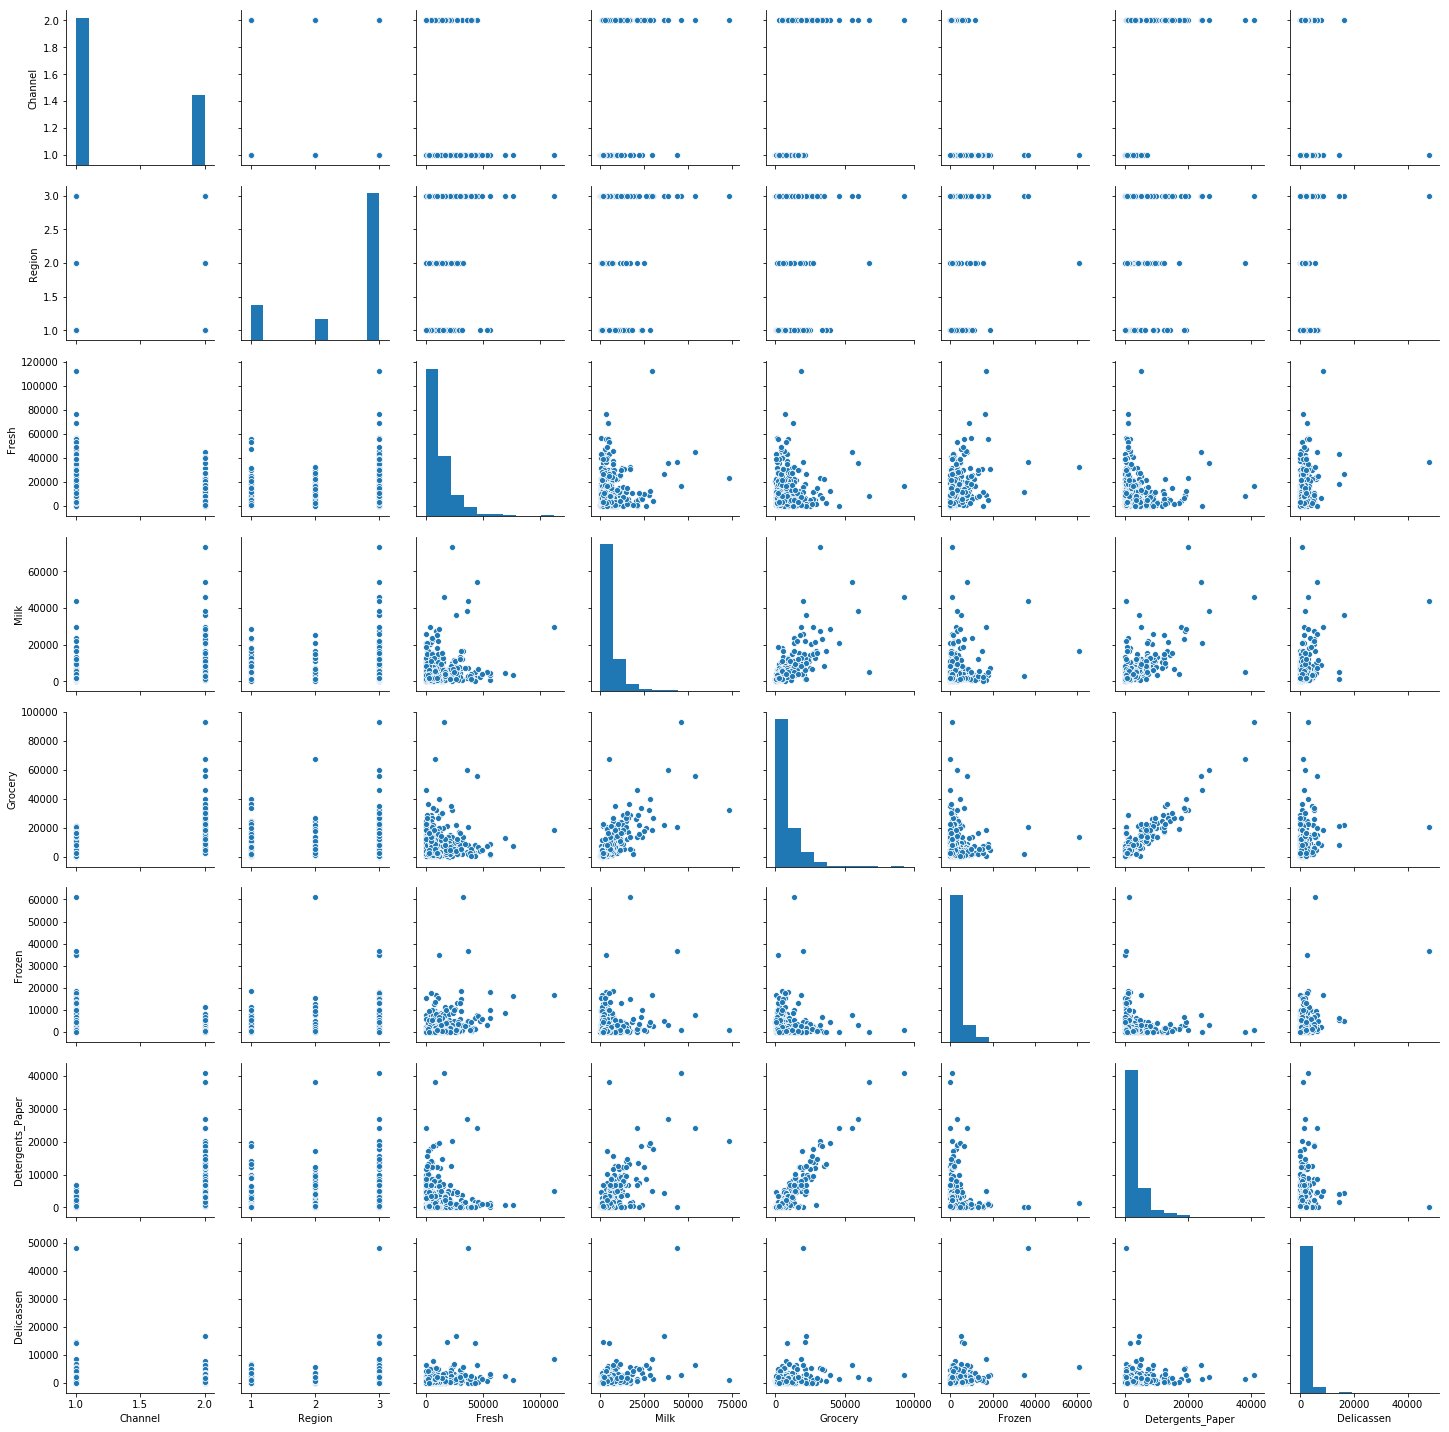

In [28]:
import seaborn as sns

sns.pairplot(df)

Vamos dropar as variáveis categóricas pois não as usaremos agora

In [29]:
df.head(1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338


In [30]:
df.drop(["Channel", "Region"], axis = 1, inplace = True)

Text(0, 0.5, 'Milk')

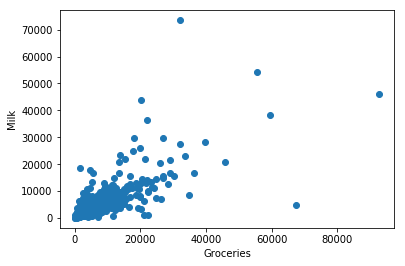

In [31]:
# Let's plot the data now
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")

Na célula abaixo, mude df para que ele receba somente as colunas desejadas. No caso, eu usei *Grocery* e *Milk*. Depois, faça um casting como matriz utilizando `as_matrix()`e então um casting de datatype de modo concatenado para float32 utilizando `astype()`.

In [32]:
# %load solutions/solution_08.py
df = df[["Grocery", "Milk"]]
df = df.as_matrix().astype("float32", copy = False)

C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Abaixo, precisaremos realizar o scaling de nossos dados utilizando o `Standard Scaler`. Faça o `fit_transform()` nos nossos dados!

In [43]:
# %load solutions/solution_09.py
from sklearn.preprocessing import StandardScaler

stscaler = StandardScaler().fit(df)
df_t = stscaler.transform(df)

C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


Finalmente, podemos utilizar o DBSCAN! Ele se encontra no módulo de cluster do scikit! Abaixo, vamos implementar o algoritmo de clustering com eps=.5 e min_samples=15

In [34]:
# %load solutions/solution_10.py

from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = .5, min_samples = 15).fit(df)

In [39]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


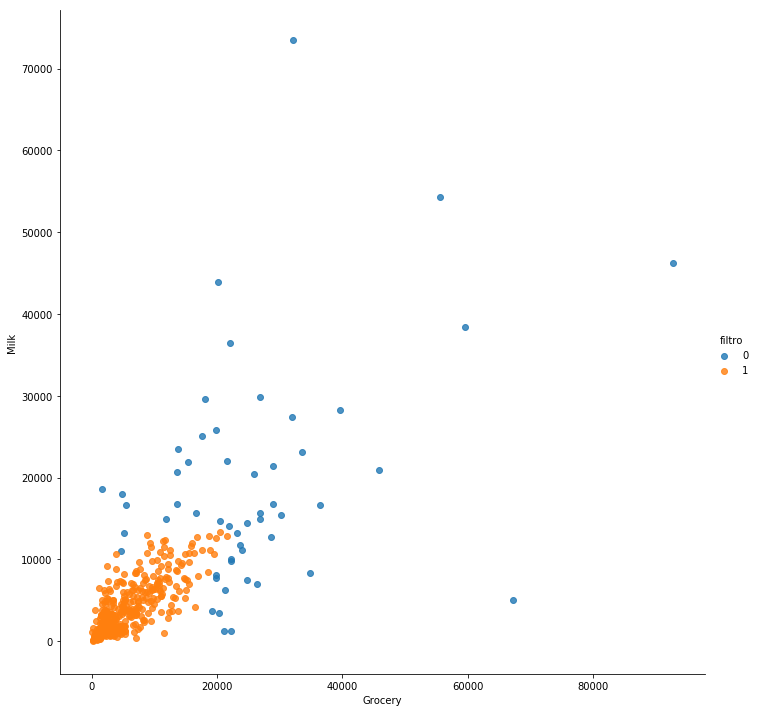

In [47]:
# df0 = pd.read_csv("data/wholesale_customers_data.csv")

import seaborn as sns

filtro=list(core_samples)

df["filtro"]=filtro

sns.lmplot("Grocery","Milk",data=df,fit_reg=False,hue="filtro",size=10)

Desafio: tente realizar um pairplot e observar alguns padrões no nosso dataset. Podemos escolher mais features para segmentar melhor nossos consumidores. Como o dataset ficará n-dimensional (n>2), precisaremos rodar algo como um PCA ou antes para selecionar features, ou depois (um t-SNE também vale) para o plotting. Arregace as mangas aí que esse desafio é real-worlds DS! Use as aulas passadas para isso ;)

Para o desafio:
- PCA-3 e depois um DBSCAN

Aplicações:
- Segmentação de clientes
- Motor de recomendação

Para processo de entrevista, em qual parte do processo vão ser feitas as perguntas pelo entrevistador. Podemos encarar isso como um processo.

[Cross Industry Standard Process for Data Mining](https://pt.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining)

<br>
<img src="imgs/crisp.png" align="center" width=400>
<br>

CRISP-DM é a abreviação de Cross Industry Standard Process for Data Mining, que pode ser traduzido como Processo Padrão Inter-Indústrias para Mineração de Dados. É um modelo de processo de mineração de dados que descreve abordagens comumente usadas por especialistas em mineração de dados para atacar problemas. 

Em Julho de 2006 o consórcio responsável pela criação do processo anunciou que iria iniciar os trabalhos na direção da segunda versão do CRISP-DM. Em Setembro de 2006, o CRISP-DM SIG reuniu-se para discutir possíveis melhorias a serem implementadas no CRISP-DM 2.0, e traçar o curso do projeto. 

Fases

- Entender o Negócio: foca em entender o objetivo do projeto a partir de uma perspectiva de negócios, definindo um plano preliminar para atingir os objetivos.

- Entender os Dados: recolhimento de dados e inicio de atividades para familiarização com os dados, identificando problemas ou conjuntos interessantes.

- Preparação dos Dados: construção do conjunto de dados final a partir dos dados iniciais. Normalmente ocorre várias vezes no processo.

- Modelagem: várias técnicas de modelagem são aplicadas, e seus parâmetros calibrados para otimização. Assim, é comum retornar à Preparação dos Dados durante essa fase.

- Avaliação: é construído um modelo que parece ter grande qualidade de uma perspectiva de análise de dados. No entanto, é necessário verificar se o modelo atinge os objetivos do negócio.

- Implantação: o conhecimento adquirido pelo modelo é organizado e apresentado de uma maneira que o cliente possa utilizar. 